In [69]:
import pandas as pd
import numpy as np
import csv
import gmaps
import matplotlib.pyplot as plt
from config import api_key

gmaps.configure(api_key=api_key)

In [8]:
#Import raw data file

file = "../arrests.csv"
og_file = pd.read_csv(file)
og_file.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0,25-44,M,BLACK,1063056,207463,40.735772,-73.715638
1,173114463,12/31/2017,478,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113,219613,40.769437,-73.910241
2,173113513,12/31/2017,849,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1,18-24,M,BLACK,1010719,186857,40.679525,-73.904572
3,173113423,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0,25-44,M,WHITE,987831,217446,40.763523,-73.987074
4,173113421,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0,45-64,M,BLACK,987073,216078,40.759768,-73.989811


In [9]:
#Filter to show just violent crimes

arrests_df = og_file.loc[
    (og_file["PD_DESC"] == "AGGRAVATED HARASSMENT 1") |
    (og_file["PD_DESC"] == "AGGRAVATED HARASSMENT 2") |
    (og_file["PD_DESC"] == "ASSAULT 2,1,PEACE OFFICER") |
    (og_file["PD_DESC"] == "ASSAULT 2,1,UNCLASSIFIED") |
    (og_file["PD_DESC"] == "ASSAULT 3") |
    (og_file["PD_DESC"] == "COURSE OF SEXUAL CONDUCT AGAINST A CHILD") |
    (og_file["PD_DESC"] == "HARASSMENT,SUBD 1,CIVILIAN") |
    (og_file["PD_DESC"] == "HOMICIDE, NEGLIGENT, VEHICLE,") |
    (og_file["PD_DESC"] == "HOMICIDE, NEGLIGENT, VEHICLE, INTOX DRIVER") |
    (og_file["PD_DESC"] == "MANSLAUGHTER,UNCLASSIFIED - NON NEGLIGENT") |
    (og_file["PD_DESC"] == "MURDER,UNCLASSIFIED") |
    (og_file["PD_DESC"] == "RAPE 1") |
    (og_file["PD_DESC"] == "RAPE 2") |
    (og_file["PD_DESC"] == "RAPE 3") |
    (og_file["PD_DESC"] == "SEXUAL ABUSE 1") |
    (og_file["PD_DESC"] == "STRANGULATION 1ST")
]

#Export to csv

arrests_df.to_csv("../nyc_violent_crimes.csv")

arrests_df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
3,173113423,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0,25-44,M,WHITE,987831,217446,40.763523,-73.987074
4,173113421,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0,45-64,M,BLACK,987073,216078,40.759768,-73.989811
6,173129349,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,9,0,18-24,F,WHITE HISPANIC,990592,202391,40.722199,-73.977122
8,173128437,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,2,25-44,M,BLACK HISPANIC,998165,226184,40.787496,-73.949752
10,173128430,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200002,M,K,83,0,25-44,M,WHITE HISPANIC,1003807,195345,40.702840,-73.929467


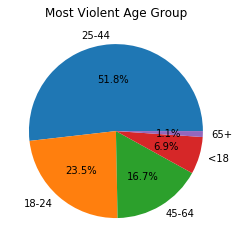

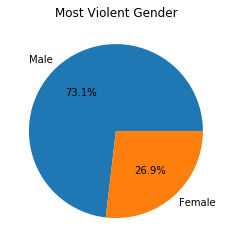

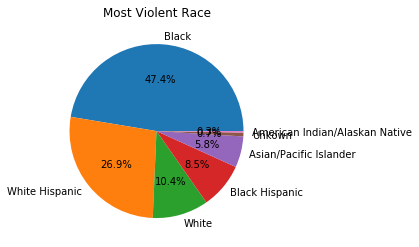

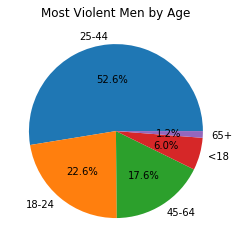

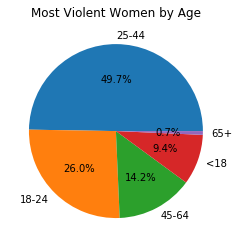

In [15]:
#Run basic analysis to see the difference between genders and ages

age = arrests_df["AGE_GROUP"]
age_groups = age.value_counts()
labels = ["25-44", "18-24", "45-64", "<18", "65+"]
plt.pie(age_groups, labels=labels, autopct="%1.1f%%")
plt.title("Most Violent Age Group")
plt.show()

sex = arrests_df["PERP_SEX"]
sex_groups = sex.value_counts()
labels_2 = ["Male", "Female"]
plt.pie(sex_groups, labels=labels_2, autopct="%1.1f%%")
plt.title("Most Violent Gender")
plt.show()

race = arrests_df["PERP_RACE"]
race_groups = race.value_counts()
labels_3 = ["Black", "White Hispanic", "White", "Black Hispanic", "Asian/Pacific Islander", "Unkown", "American Indian/Alaskan Native"]
plt.pie(race_groups, labels=labels_3, autopct="%1.1f%%")
plt.title("Most Violent Race")
plt.show()

age_sex = arrests_df[["AGE_GROUP", "PERP_SEX"]]
male_age = age_sex.loc[age_sex["PERP_SEX"] == "M",:]
female_age = age_sex.loc[age_sex["PERP_SEX"] == "F",:]
male_age = male_age["AGE_GROUP"]
female_age = female_age["AGE_GROUP"]

male_age = male_age.value_counts()
labels_4 = ["25-44", "18-24", "45-64", "<18", "65+"]
plt.pie(male_age, labels=labels_4, autopct="%1.1f%%")
plt.title("Most Violent Men by Age")
plt.show()

female_age = female_age.value_counts()
labels_5 = ["25-44", "18-24", "45-64", "<18", "65+"]
plt.pie(female_age, labels=labels_5, autopct="%1.1f%%")
plt.title("Most Violent Women by Age")
plt.show()

In [64]:
#Sort by number of arrests per day and run basic calculations

date_groups = arrests_df.groupby("ARREST_DATE")
crime_counts = date_groups.count()
crime_counts = crime_counts[["PD_DESC"]]
crime_counts = crime_counts.rename(columns = {"PD_DESC": "Number of arrests"})
arrest_count_by_day = crime_counts.sort_values("Number of arrests", ascending=True)
most_violent_day = arrest_count_by_day.max()
least_violent_day = crime_counts.loc[crime_counts["Number of arrests"] == 50,:]
average_arrests = arrest_count_by_day["Number of arrests"].mean()
arrest_count_by_day.head()

,Number of arrests
ARREST_DATE,
9/6/2014,7
12/31/2014,50
12/24/2014,51
11/27/2014,53
11/23/2017,56


In [81]:
#Show the results

print(f"""
From 2014 to 2017, there were an average of {round(average_arrests)} arrests per day due to violent crimes.
The most violent crime arrests ever recorded in a day was {most_violent_day["Number of arrests"]}.
The least violent crime arrests ever recorded in a day was {least_violent_day["Number of arrests]}".
""")


From 2014 to 2017, there were an average of 131 arrests per day due to violent crimes.
The most violent crime arrests ever recorded in a day was 209.
The least violent crime arrests ever recorded in a day was 50.



In [67]:
#Add a datetime column to use for a scatter plot

arrest_count_by_day["Date"] = arrest_count_by_day.index
aligned_dates = arrest_count_by_day.sort_values("Date", ascending=False)
arrest_count_by_day['Date'] = pd.to_datetime(arrest_count_by_day.Date)
arrest_count_by_day = arrest_count_by_day.sort_values(by="Date")
arrest_count_by_day.head()

,Number of arrests,Date
ARREST_DATE,,
9/6/2014,7,2014-09-06
9/7/2014,152,2014-09-07
9/8/2014,149,2014-09-08
9/9/2014,144,2014-09-09
9/10/2014,140,2014-09-10


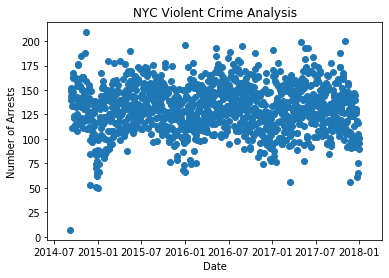

In [85]:
#Create a scatter plot from the arrest count by day dataframe

x_axis = arrest_count_by_day["Date"]
y_axis = arrest_count_by_day["Number of arrests"]
plt.scatter(x_axis, y_axis)
plt.title("NYC Violent Crime Analysis")
plt.ylabel("Number of Arrests")
plt.xlabel("Date")
plt.show()

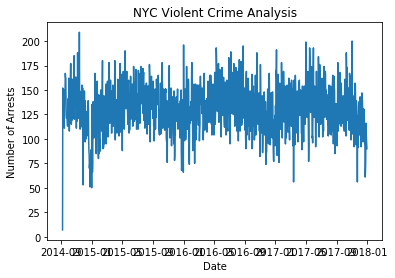

In [86]:
#Plot a line chart from the same data, just for funzies

plt.plot(x_axis, y_axis)
plt.xlabel("Date")
plt.ylabel("Number of Arrests")
plt.title("NYC Violent Crime Analysis")
plt.show()

In [7]:
#Import csv containing only violent crimes from October 2014 (which is the most violent month we have data for)

file_2 = "../october_2014.csv"
october_2014 = pd.read_csv(file_2)
october_2014.head()

,ARREST_DATE,PD_DESC,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,10/31/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.731668,-73.989415
1,10/31/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,M,WHITE HISPANIC,40.864328,-73.868406
2,10/31/2014,"MURDER,UNCLASSIFIED",MURDER & NON-NEGL. MANSLAUGHTER,25-44,F,BLACK,40.671111,-73.913563
3,10/31/2014,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,18-24,F,BLACK,40.648867,-73.950822
4,10/31/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,BLACK,40.717115,-73.920426


In [10]:
#Plot a heatmap showing the most violent parts of NYC

locations = october_2014[["Latitude", "Longitude"]]

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, max_intensity=10, point_radius=10)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))